In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

In [9]:
output_dir = "./figures/"


In [ ]:
# def draw_graph(G, node_names={}, filename=None, node_size=50, layout = None):
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None, layout=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    
    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")

# Simple Example of Graphs


In [5]:
complete = nx.complete_graph(n=7)
lollipop = nx.lollipop_graph(m=7, n=3)
barbell = nx.barbell_graph(m1=7, m2=4)

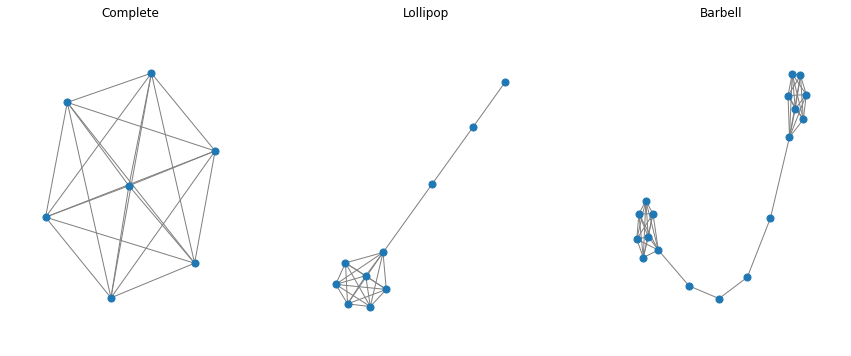

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
draw_graph(complete)
plt.title("Complete")
plt.subplot(1,3,2)
plt.title("Lollipop")
draw_graph(lollipop)
plt.subplot(1,3,3)
plt.title("Barbell")
draw_graph(barbell)
#plt.savefig(os.path.join(output_dir, "SimpleGraphs.png"))

In [13]:
complete = nx.relabel_nodes(nx.complete_graph(n=7), lambda x: x + 0)
lollipop = nx.relabel_nodes(nx.lollipop_graph(m=7, n=3), lambda x: x+100)
barbell = nx.relabel_nodes(nx.barbell_graph(m1=7, m2=4), lambda x: x+200)

In [14]:
def get_random_node(graph):
    return np.random.choice(graph.nodes)

In [15]:
import numpy as np


# We compose simple graphs into one


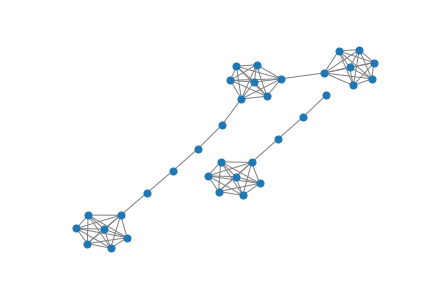

In [17]:
allGraphs = nx.compose_all([complete, barbell, lollipop])
allGraphs.add_edge(get_random_node(lollipop), get_random_node(lollipop))
allGraphs.add_edge(get_random_node(complete), get_random_node(barbell))
draw_graph(allGraphs, layout=nx.kamada_kawai_layout)


# Model Barabasi Albert


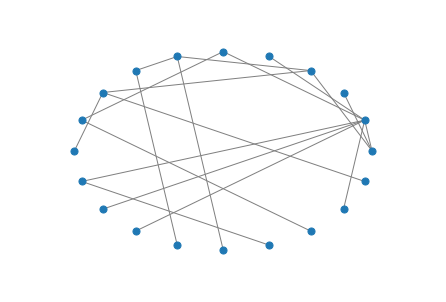

In [18]:
BA_graph_small = nx.extended_barabasi_albert_graph(n=20,m=1,p=0,q=0)
draw_graph(BA_graph_small, layout=nx.circular_layout)


# Other simple graph Benchmarks



In [19]:
import pandas as pd


In [20]:
graph = nx.florentine_families_graph()


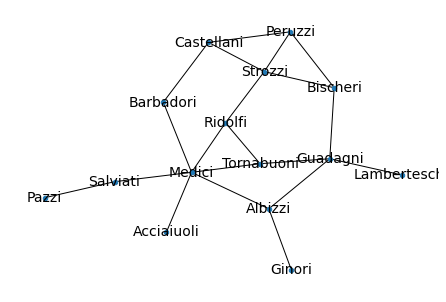

In [21]:
nx.draw_kamada_kawai(graph, with_labels=True, node_size=20, font_size=14)
plt.savefig("Florentine.png")

In [30]:
from scipy.io import mmread
adj_matrix = mmread("ca-AstroPh.mtx")

In [33]:
graph = nx.from_scipy_sparse_matrix(adj_matrix)


In [34]:
degrees = dict(nx.degree(graph))


In [35]:
ci = nx.clustering(graph)


In [36]:
centrality = nx.centrality.eigenvector_centrality(graph)


In [37]:
stats = pd.DataFrame({
    "centrality": centrality, 
    "C_i": ci, 
    "degree": degrees
})

In [38]:
stats.head()


,centrality,C_i,degree
0,8.901198e-05,0.692137,43
1,3.208282e-10,1.000000,2
2,3.407931e-04,0.242424,12
3,4.290384e-06,0.000000,1
4,6.722036e-07,1.000000,2


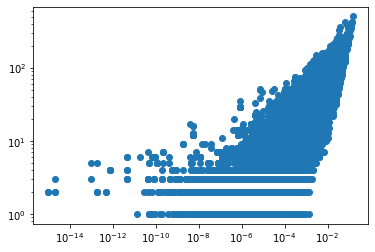

In [41]:
plt.plot(stats["centrality"], stats["degree"], 'o')
plt.xscale("log")
plt.yscale("log")

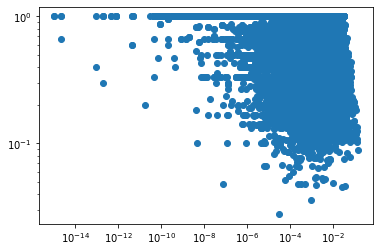

In [42]:
plt.plot(stats["centrality"], stats["C_i"], 'o')
plt.xscale("log")
plt.yscale("log")

# Ego-network(the node with all its neighbors)


<p>Here we plot the ego-network of the most-connected node, that has id 6933. However, even this network looks a bit messy since it has hundreds of nodes. We therefore sample randomly or based on centrality/clustering coefficient in order to plot a relevant subgraph.</p>

In [44]:
neighbors = [n for n in nx.neighbors(graph, 6933)]


In [45]:
len(neighbors)

504

In [46]:
sampling = 0.1


In [48]:
nTop = round(len(neighbors)*sampling)


In [50]:
nTop

50

In [51]:
idx = {
    "random": stats.loc[neighbors].sort_index().index[:nTop], 
    "centrality": stats.loc[neighbors].sort_values("centrality", ascending=False).index[:nTop],
    "C_i": stats.loc[neighbors].sort_values("C_i", ascending=False).index[:nTop]
}

In [52]:
def plotSubgraph(graph, indices, center = 6933):
    draw_graph(
        nx.subgraph(graph, list(indices) + [center]),
        layout = nx.kamada_kawai_layout
    )

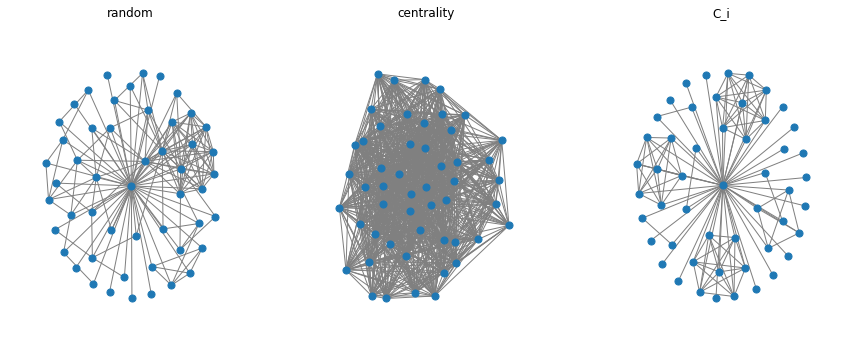

In [54]:
plt.figure(figsize=(15,6))
for ith, title in enumerate(["random", "centrality", "C_i"]):
    plt.subplot(1,3,ith+1)
    plotSubgraph(graph, idx[title])
    plt.title(title)
#plt.savefig(os.path.join(output_dir, "PhAstro"))

# Data to Gephi

In [55]:
#we could also export the data from networkx in order to plot it and analyse it using the Gephi software.
nx.write_gexf(graph, 'ca-AstroPh.gexf')


# Bipartite Graphs


In [56]:
n=10

n_nodes = 10
n_edges = 12

bottom_nodes = [ith for ith in range(n) if int(ith) % 2 == 0]
top_nodes = [ith for ith in range(n) if int(ith) % 2 == 1.0]

In [62]:
bottom_nodes

[0, 2, 4, 6, 8]

In [57]:
iter_edges = zip(np.random.choice(bottom_nodes, n_edges), np.random.choice(top_nodes, n_edges))

edges = pd.DataFrame([{"source": a, "target": b} for a, b in iter_edges])

In [58]:
B = nx.Graph()

B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)

In [59]:
B.add_edges_from([tuple(x) for x in edges.values])


In [60]:
from networkx.drawing.layout import bipartite_layout


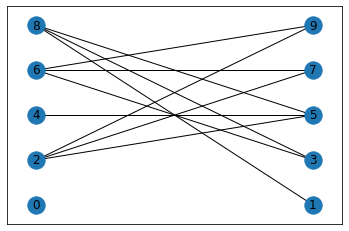

In [61]:
pos = bipartite_layout(B, bottom_nodes)

nx.draw_networkx(B, pos=pos)